In [675]:
### Need to integrate dataframe of confirmed serial killings with exisiting homicide records then train neural network

In [676]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [864]:
# confirmed killings from 60 different serial killers on Wikipedia
confirmed = pd.read_excel('Confirmed Serial Killings Database.xlsx')
confirmed = confirmed.drop('Murderer', axis=1)
confirmed['SK'] = True
confirmed = confirmed.replace("F", "Female")
confirmed = confirmed.replace("M", "Male")
confirmed = confirmed.replace("U", "Unknown")
confirmed = confirmed.replace("M ", "Male")
confirmed = confirmed.replace("U ", "Unknown")
confirmed = pd.get_dummies(confirmed, columns=['Perpetrator Sex', 'Perpetrator Race','Victim Sex','Weapon', 'State','City'])

In [865]:
confirmed.head()

,Year,Victim Age,SK,Perpetrator Sex_Female,Perpetrator Sex_Male,Perpetrator Race_Black,Perpetrator Race_Unknown,Perpetrator Race_White,Victim Sex_Female,Victim Sex_Male,...,City_St Regis,City_Suffolk County,City_Tampa Bay,City_Temecula,City_Terrebonne Parish,City_Toledo,City_Vancouver,City_Villa Park,City_Walnut,City_Watertown
0,1983,83.0,True,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1987,31.0,True,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1990,48.0,True,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1990,13.0,True,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2002,45.0,True,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [866]:
# load in the homicides database from MAP
homicides = pd.read_csv("homicide_database.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [867]:
homicides.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [868]:
# train a neural network on my database and samples from the homicide database
training_confirmed, test_confirmed = train_test_split(confirmed, test_size=0.4)

In [869]:
homicides.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [870]:
homicides_cleaned = homicides[homicides['Crime Type']=="Murder or Manslaughter"]
homicides_cleaned = homicides.drop(['Record ID','Agency Code','Agency Name','Agency Type','Month','Incident','Crime Solved',
                                   'Victim Race','Victim Ethnicity','Perpetrator Age','Perpetrator Ethnicity','Relationship',
                                   'Victim Count','Perpetrator Count','Record Source', 'Crime Type'], axis=1)
homicides_cleaned['SK'] = False

In [871]:
dummified_homicides = pd.get_dummies(homicides_cleaned, columns=['Perpetrator Sex', 'Perpetrator Race','Victim Sex','Weapon', 'State','City'])

In [872]:
dummified_homicides.head()

,Year,Victim Age,SK,Perpetrator Sex_Female,Perpetrator Sex_Male,Perpetrator Sex_Unknown,Perpetrator Race_Asian/Pacific Islander,Perpetrator Race_Black,Perpetrator Race_Native American/Alaska Native,Perpetrator Race_Unknown,...,City_Yellowstone,City_Yoakum,City_Yolo,City_York,City_Young,City_Yuba,City_Yukon-Koyukuk,City_Yuma,City_Zapata,City_Zavala
0,1980,14,False,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1980,43,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980,30,False,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1980,43,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,30,False,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [686]:
homicides_train = dummified_homicides.sample(n=len(training_confirmed))
homicides_test = dummified_homicides.sample(n=len(test_confirmed))

In [687]:
training_whole = pd.concat([training_confirmed, homicides_train])
training_whole = training_whole.fillna(-1)

In [688]:
training_whole

,Year,Victim Age,SK,Perpetrator Sex_Female,Perpetrator Sex_Male,Perpetrator Race_Black,Perpetrator Race_Unknown,Perpetrator Race_White,Victim Sex_Female,Victim Sex_Male,...,City_Yellowstone,City_Yoakum,City_Yolo,City_York,City_Young,City_Yuba,City_Yukon-Koyukuk,City_Yuma,City_Zapata,City_Zavala
8,2000,32.0,True,0,1,0,0,1,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
288,1998,38.0,True,0,1,0,1,0,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
226,1985,38.0,True,0,1,0,0,1,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
28,1995,27.0,True,0,1,0,1,0,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
198,2004,21.0,True,0,1,0,1,0,0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466825,2004,7.0,False,0,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562701,2009,65.0,False,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406260,2000,25.0,False,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555195,2009,53.0,False,1,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [689]:
labels = training_whole['SK']
training_whole = training_whole.drop('SK', axis=1)

In [690]:
# train the neural network
sk_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500,10), random_state=1)

In [691]:
sk_classifier.fit(training_whole, labels)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [692]:
# test accuracy of the model
testing_whole = pd.concat([test_confirmed, homicides_test])
testing_whole = testing_whole.fillna(-1)

In [693]:
testing_whole

,Year,Victim Age,SK,Perpetrator Sex_Female,Perpetrator Sex_Male,Perpetrator Race_Black,Perpetrator Race_Unknown,Perpetrator Race_White,Victim Sex_Female,Victim Sex_Male,...,City_Yellowstone,City_Yoakum,City_Yolo,City_York,City_Young,City_Yuba,City_Yukon-Koyukuk,City_Yuma,City_Zapata,City_Zavala
200,2005,31.0,True,0,1,0,1,0,0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
80,1984,9.0,True,0,1,1,0,0,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,1992,29.0,True,0,1,1,0,0,1,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
199,2005,22.0,True,0,1,0,1,0,0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
196,2003,19.0,True,0,1,0,1,0,0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94352,1984,49.0,False,0,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535782,2008,20.0,False,0,1,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130876,1986,19.0,False,0,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504478,2006,83.0,False,0,1,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [694]:
test_labels = testing_whole['SK']
testing_whole = testing_whole.drop('SK', axis=1)
# dummified_testing_whole = pd.get_dummies(testing_whole, columns=['Perpetrator Sex', 'Perpetrator Race','Victim Sex','Weapon', 'State','City'])
# dummified_testing_whole = dummified_testing_whole.fillna(-1)

In [695]:
label_predictions = sk_classifier.predict(testing_whole)

In [696]:
from sklearn.metrics import accuracy_score

In [697]:
accuracy_score(test_labels, label_predictions)

0.5

Well, shoot. Now what?

In [698]:
## Trying a regressor which can output probabilities instead of a Yes/No

In [699]:
from sklearn.neural_network import MLPRegressor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [700]:
# first iteration of regressor
sk_regressor = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100,10))

In [701]:
sk_regressor.fit(training_whole, labels)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [702]:
probability_predictions = sk_regressor.predict(testing_whole)

In [703]:
from sklearn.metrics import mean_squared_error

In [704]:
mean_squared_error(test_labels, probability_predictions)

0.05485282536106359

In [705]:
print(probability_predictions)

[1.01944617 1.01263858 1.03263204 1.01063335 1.00729574 1.01052477
 1.06780288 1.04232408 1.02066739 1.02811967 1.00973116 0.98287017
 1.00933999 0.99722321 1.02381851 1.02526153 1.02095639 1.02826644
 1.03276635 1.00686307 1.01897785 1.00621581 0.99421212 1.04451654
 1.02019094 1.00275151 1.03726536 1.00620239 1.03550846 1.0411758
 0.99421212 0.99421212 1.01815044 1.0908982  1.0511083  1.0369621
 1.03841107 1.01351795 1.01455945 0.9865839  1.01582748 1.01424735
 1.0185242  1.04208416 1.00145117 0.98720789 1.00275151 1.02178182
 1.01139355 0.98570593 1.02027265 1.00311983 0.97708999 0.99421212
 1.04218698 0.99383396 0.98709593 1.0077334  1.01001367 1.03840587
 1.04916665 0.98731013 1.02828647 1.01681259 1.0245203  0.9937248
 1.04864809 1.02571091 1.0291752  1.08082789 1.00159675 0.99450376
 1.03691097 1.01903832 1.00408289 1.05936978 1.01970372 1.03078291
 1.01444531 1.03447203 1.05859542 1.00857121 0.99975327 0.97925667
 1.01848585 1.00159675 1.01711281 1.01056346 1.01743593 0.9912671

# I want to try shuffling the dataset before feeding it in, but that shouldn't make a difference. Also need to perform some cross validation.

In [706]:
# Perform cross validation on the model

In [707]:
from sklearn.model_selection import cross_val_score

In [718]:
sk_regressor_cv = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(10,10,10,10))

In [792]:
# concat data set - want to use a high number of uncomfired cases to ensure that categorical variable repeats aren't messing things up
entire_set = pd.concat([dummified_homicides.sample(5000),confirmed])
# shuffle the data set to assure myself that that's not messing with things
entire_set = entire_set.sample(frac=1)
entire_set = entire_set.fillna(-1)
entire_set_labels = entire_set['SK']
entire_set = entire_set.drop('SK', axis=1)

In [720]:
# perform cross validation
res = cross_val_score(sk_regressor_cv, entire_set, entire_set_labels, cv=10, scoring='neg_mean_squared_error')
print(res)

[-2.80378416e-05 -9.64867330e-06 -4.98224885e-02 -5.96176740e-02
 -1.11599390e-05 -9.62414916e-06 -7.91260698e-06 -8.75115275e-06
 -1.08558895e-05 -9.41108767e-06]


In [721]:
print("RMSE: %0.2f (+/- %0.2f)" % (res.mean(), res.std() * 2))

RMSE: -0.01 (+/- 0.04)


In [793]:
# I don't think this is a valid way to score the output since we're not doing a classification type mlp
res = cross_val_score(sk_regressor_cv, entire_set, entire_set_labels, cv=10)
print(res)
print("Accuracy: %0.2f (+/- %0.2f)" % (res.mean(), res.std() * 2))

[0.97025234 0.92814244 0.95691208 0.95334309 0.9659137  0.95768887
 0.92916338 0.95773535 0.96130815 0.95755798]
Accuracy: 0.95 (+/- 0.03)


In [713]:
[entire_set_labels.shape[0]]

[5339]

In [794]:
sk_regressor_cv.fit(entire_set, entire_set_labels)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

<module 'VisualizeNN' from '/Users/max/Documents/School/Applied Data Analysis/project/VisualizeNN.py'>

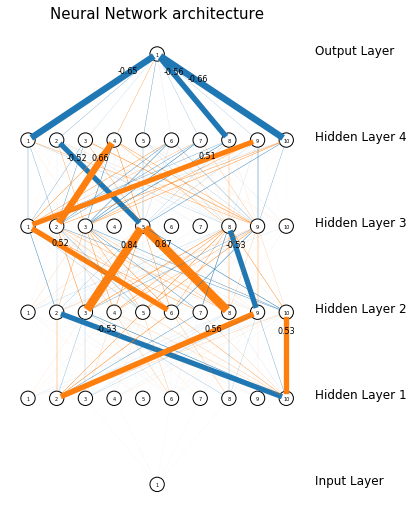

In [725]:
# create visualization of neural network here
# thanks to https://github.com/jzliu-100/visualize-neural-network
import VisualizeNN as VisNN
importlib.reload(VisNN)
# input and output layers are far too large to fit on the image
network=VisNN.DrawNN([1, 10, 10, 10, 10, 1], sk_regressor_cv.coefs_)
network.draw()

In [554]:
print(sk_regressor_cv.coefs_[3])

[[-3.15049073e-01  3.37241102e-02 -2.35708477e-01  1.86724878e-01
  -1.78813569e-02  3.88845558e-01  2.06712843e-01 -2.81266251e-01
   5.07774504e-01 -9.70106001e-02]
 [-2.41667485e-01 -3.50416429e-02 -3.18794748e-01  6.66794699e-01
  -1.88941761e-02 -3.55562681e-01 -3.18654074e-01  1.85675536e-03
   1.11704887e-01  4.11757215e-01]
 [ 5.84325155e-02  3.06006549e-01 -8.53099537e-02 -1.86678938e-01
  -5.28310870e-03 -4.63745317e-01 -4.83089401e-01 -4.98799201e-01
   3.66049272e-01  4.11617813e-01]
 [ 7.76952221e-03 -2.96237723e-10 -3.96688080e-13 -3.46586261e-02
   7.35155588e-04  3.46687146e-02 -1.80661152e-02  2.15136053e-02
   4.66895626e-02  1.99865100e-02]
 [-7.77624383e-03 -5.15627437e-01  2.91874000e-01  4.66649390e-01
  -2.65515231e-01 -1.15231193e-01  4.21778759e-03 -1.34227566e-01
  -1.24944473e-01 -4.05164260e-01]
 [ 1.97295051e-06 -1.27742908e-05 -1.23573869e-02 -1.88321524e-04
  -2.42597130e-05 -5.56308076e-08  2.47117876e-02  6.12884091e-03
  -1.08712341e-09  2.13939884e-02

In [886]:
# More robust testing required - going to split by actual serial killer, and see if the new crimes are effectively being detected
# Does the model need to have seen that particular murderer before, or can it extrapolate well to new murderers?
# Ran this part multiple times in order to get an average mse

In [887]:
# First finding how many different serial killers are in this dataset
# Reimporting the original serial killer dataset
confirmed_split = pd.read_excel('Confirmed Serial Killings Database.xlsx')
confirmed_split['SK'] = True
confirmed_split = confirmed_split.replace("F", "Female")
confirmed_split = confirmed_split.replace("M", "Male")
confirmed_split = pd.get_dummies(confirmed_split, columns=['Perpetrator Sex', 'Perpetrator Race','Victim Sex','Weapon', 'State','City'])

In [888]:
# We're going to split the dataset in half randomly by grouping the actual serial killers, instead of randomly sampling the rows
train_sks, test_sks = train_test_split(confirmed_split.Murderer.unique(), test_size = 0.5)

In [889]:
train_confirmed_sksplit = confirmed_split[confirmed_split['Murderer'].isin(train_sks)]
test_confirmed_sksplit = confirmed_split[confirmed_split['Murderer'].isin(test_sks)]

In [890]:
train_confirmed_sksplit = train_confirmed_sksplit.drop(["Murderer"], axis=1)
test_confirmed_sksplit = test_confirmed_sksplit.drop(["Murderer"], axis=1)

In [891]:
normal_records_training = dummified_homicides.sample(5000)
normal_records_testing = dummified_homicides.sample(5000)
# concatenate and get labels
sksplit_training = pd.concat([train_confirmed_sksplit, normal_records_training])
sksplit_training = sksplit_training.sample(frac=1)
sksplit_testing = pd.concat([test_confirmed_sksplit, normal_records_testing])
sksplit_testing = sksplit_testing.sample(frac=1)
skplit_training_labels = sksplit_training['SK']
sksplit_testing_labels = sksplit_testing['SK']
sksplit_training = sksplit_training.drop("SK", axis=1)
sksplit_training = sksplit_training.fillna(-1)
sksplit_testing = sksplit_testing.drop("SK", axis=1)
sksplit_testing = sksplit_testing.fillna(-1)

In [892]:
# Now, perform the training with the same kind of model as above and evaluate

In [893]:
sk_regressor_split = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(10,10,10,10))

In [894]:
sk_regressor_split.fit(sksplit_training, skplit_training_labels)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [895]:
predicted_labels = sk_regressor_split.predict(sksplit_testing)

In [896]:
np.sqrt(mean_squared_error(sksplit_testing_labels, predicted_labels))

0.022837781510841516

In [897]:
min(predicted_labels)

-0.03108153465938246

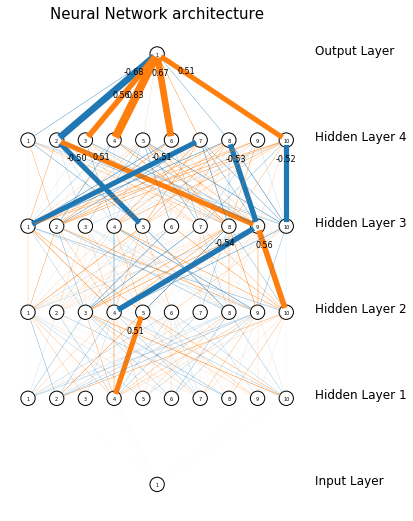

In [898]:
network=VisNN.DrawNN([1, 10, 10, 10, 10, 1], sk_regressor_split.coefs_)
network.draw()

In [567]:
# run the regressor on all of the input from the homicides dataset, and see what the min and max probabilities are - do some
# jump out more than others do as potential serial killer activity? 

In [583]:
not_included = list(set(sksplit_training.columns) - set(dummified_homicides.columns))
not_included

['City_Norwood',
 'City_Kilpatrick',
 'City_Salt Lake City',
 'City_Assumption Parish',
 'City_New Britain',
 'City_Cincinnati',
 'City_Temecula',
 'City_Indio',
 'City_Jacksonville',
 'City_Sonoma County',
 'City_Lake Village',
 'City_Suffolk County',
 'Victim Sex_U',
 'State_Massachussets',
 'City_Niagara Falls',
 'City_Portland',
 'City_Indianapolis',
 'City_Silver Spring',
 'City_Gary',
 'City_Kansas City',
 'City_Tampa Bay',
 'City_Vancouver',
 'City_St Charles Parish',
 'City_Dayton Beach',
 'City_Route 60',
 'City_Hasbrouck Heights',
 'City_Kenosha County',
 'City_Phoenix',
 'City_Terrebonne Parish',
 'City_Chicago',
 'City_Manhattan',
 'City_Pocahontas County',
 'City_Gold Beach',
 'City_Pomona',
 'City_Bethesda',
 'City_Fort Benning',
 'City_Highway 71',
 'City_El Monte',
 'City_Farmington',
 'City_Clarendon Hills',
 'City_Watertown',
 'City_Kanakee County',
 'City_Johnstown',
 'City_Burton',
 'City_Gulfport',
 'City_Detroit',
 'City_Colorado Springs',
 'City_North Sea',
 'Cit

In [585]:
all_homicides = pd.concat([dummified_homicides, pd.DataFrame(columns = not_included)])
all_homicides = all_homicides.fillna(-1)
all_homicides = all_homicides.drop("SK", axis=1)

In [586]:
len(all_homicides.columns)

1945

In [587]:
entire_homicide_predictions = sk_regressor_split.predict(all_homicides)

In [588]:
min(entire_homicide_predictions)

-0.12777513059571644

In [589]:
max(entire_homicide_predictions)

0.6217990478334814

In [593]:
### is this being driven entirely by location? Trying cross validation again without the cities involved

In [900]:
confirmed = pd.read_excel('Confirmed Serial Killings Database.xlsx')
confirmed = confirmed.drop('Murderer', axis=1)
confirmed['SK'] = True
confirmed = confirmed.replace("F", "Female")
confirmed = confirmed.replace("M", "Male")
confirmed = confirmed.replace("U", "Unknown")
confirmed = confirmed.replace("M ", "Male")
confirmed = confirmed.replace("U ", "Unknown")
confirmed = confirmed.drop("City", axis=1)
confirmed = pd.get_dummies(confirmed, columns=['Perpetrator Sex', 'Perpetrator Race','Victim Sex','Weapon', 'State'])

In [901]:
dummified_homicides = pd.get_dummies(homicides_cleaned, columns=['Perpetrator Sex', 'Perpetrator Race','Victim Sex','Weapon', 'State'])
dummified_homicides = dummified_homicides.drop("City", axis=1)

In [767]:
sk_regressor_cv = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(10,10,10,10))

In [768]:
# concat data set - want to use a high number of uncomfired cases to ensure that categorical variable repeats aren't messing things up
entire_set = pd.concat([dummified_homicides.sample(5000),confirmed])
# shuffle the data set to assure myself that that's not messing with things
entire_set = entire_set.sample(frac=1)
entire_set = entire_set.fillna(-1)
entire_set_labels = entire_set['SK']
entire_set = entire_set.drop('SK', axis=1)

In [769]:
# perform cross validation
res = cross_val_score(sk_regressor_cv, entire_set, entire_set_labels, cv=10, scoring='neg_mean_squared_error')
print(res)

[-0.00322751 -0.00260656 -0.00274755 -0.00357964 -0.00268226 -0.00343031
 -0.00326127 -0.00275563 -0.00293115 -0.00296542]


In [770]:
print("RMSE: %0.2f (+/- %0.2f)" % (res.mean(), res.std() * 2))

RMSE: -0.00 (+/- 0.00)


In [771]:
res = cross_val_score(sk_regressor_cv, entire_set, entire_set_labels, cv=10)
print(res)
print("Accuracy: %0.2f (+/- %0.2f)" % (res.mean(), res.std() * 2))

[0.95342394 0.94372531 0.96035023 0.93453749 0.95941936 0.95160667
 0.94812751 0.94803014 0.93671755 0.94586543]
Accuracy: 0.95 (+/- 0.02)


In [772]:
sk_regressor_cv.fit(entire_set, entire_set_labels)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [773]:
for x in sk_regressor_cv.coefs_:
    print(len(x))

84
10
10
10
10


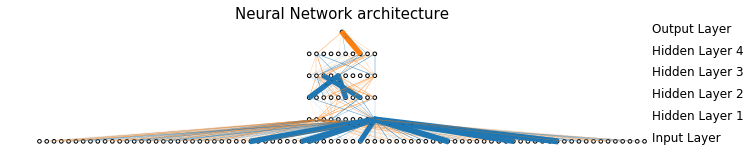

In [674]:
network=VisNN.DrawNN([84, 10, 10, 10, 10, 1], sk_regressor_cv.coefs_)
network.draw()

In [791]:
# checking what the highly negative inputs layer weights are
for i in range(len(sk_regressor_cv.coefs_[0])):
    if (sk_regressor_cv.coefs_[0][i][-1]) < -0.3:
        print(i, entire_set.columns[i])

16 Weapon_Explosives
17 Weapon_Fall
21 Weapon_Handgun
29 State_Alabama
36 State_Delaware
37 State_District of Columbia
40 State_Hawaii
44 State_Iowa
46 State_Kentucky
48 State_Maine
50 State_Massachusetts
52 State_Minnesota
53 State_Mississippi
56 State_Nebraska
57 State_Nevada
63 State_North Dakota
65 State_Oklahoma
71 State_Tennessee
75 State_Virginia


In [619]:
# again cross validation where we're splitting by serial killer group

In [935]:
# First finding how many different serial killers are in this dataset
# Reimporting the original serial killer dataset
confirmed_split = pd.read_excel('Confirmed Serial Killings Database.xlsx')
confirmed_split['SK'] = True
confirmed_split = confirmed_split.replace("F", "Female")
confirmed_split = confirmed_split.replace("M", "Male")
confirmed_split = pd.get_dummies(confirmed_split, columns=['Perpetrator Sex', 'Perpetrator Race','Victim Sex','Weapon', 'State'])
confirmed_split = confirmed_split.drop("City", axis=1)

In [936]:
train_sks, test_sks = train_test_split(confirmed_split.Murderer.unique(), test_size = 0.5)

In [937]:
train_confirmed_sksplit = confirmed_split[confirmed_split['Murderer'].isin(train_sks)]
test_confirmed_sksplit = confirmed_split[confirmed_split['Murderer'].isin(test_sks)]

In [938]:
train_confirmed_sksplit = train_confirmed_sksplit.drop(["Murderer"], axis=1)
test_confirmed_sksplit = test_confirmed_sksplit.drop(["Murderer"], axis=1)

In [939]:
normal_records_training = dummified_homicides.sample(5000)
normal_records_testing = dummified_homicides.sample(5000)
# concatenate and get labels
sksplit_training = pd.concat([train_confirmed_sksplit, normal_records_training])
sksplit_training = sksplit_training.sample(frac=1)
sksplit_testing = pd.concat([test_confirmed_sksplit, normal_records_testing])
sksplit_testing = sksplit_testing.sample(frac=1)
skplit_training_labels = sksplit_training['SK']
sksplit_testing_labels = sksplit_testing['SK']
sksplit_training = sksplit_training.drop("SK", axis=1)
sksplit_training = sksplit_training.fillna(-1)
sksplit_testing = sksplit_testing.drop("SK", axis=1)
sksplit_testing = sksplit_testing.fillna(-1)

In [940]:
sk_regressor_split = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(10,10,10,10))

In [941]:
sk_regressor_split.fit(sksplit_training, skplit_training_labels)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [942]:
predicted_labels = sk_regressor_split.predict(sksplit_testing)

In [943]:
np.sqrt(mean_squared_error(sksplit_testing_labels, predicted_labels))

0.042429448907197506

In [783]:
import importlib
importlib.reload(VisNN)

<module 'VisualizeNN' from '/Users/max/Documents/School/Applied Data Analysis/project/VisualizeNN.py'>

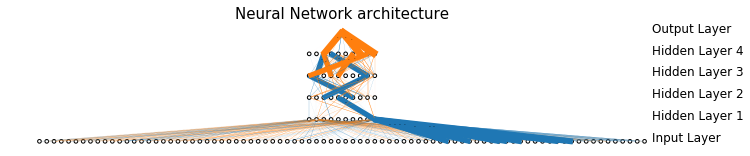

In [673]:
network=VisNN.DrawNN([86, 10, 10, 10, 10, 1], sk_regressor_split.coefs_)
network.draw()

In [944]:
# checking what the highly negative inputs layer weights are
for i in range(len(sk_regressor_split.coefs_[0])):
    if (sk_regressor_split.coefs_[0][i][-1]) < -0.3:
        print(sksplit_training.columns[i])

Perpetrator Race_Asian/Pacific Islander
Perpetrator Race_Native American/Alaska Native
Victim Sex_Unknown
Weapon_Explosives
Weapon_Fire
Weapon_Rifle
State_Alabama
State_Delaware
State_District of Columbia
State_Kentucky
State_Massachusetts
State_Mississippi
State_Nevada
State_New Mexico
State_Rhodes Island
State_Virginia
